HandWritten digit recognetion project

In [1]:
#Generate dataset
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
  

In [2]:
#load the dataset
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
print(data)

     label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8   
2945     9      0      0      0      0      0      0      0      1      1  \
1970     3      0      0      0      0      0      0      0      0      0   
2707     8      0      0      0      0      0      0      0      0      0   
1606     0      0      0      0      0      0      0      0      0      0   
2353     5      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2003     3      0      0      0      0      0      0      0      0      0   
2369     5      0      0      0      0      0      0      0      0      0   
185      1      0      0      0      0      0      0      0      0      0   
2114     4      0      0      0      0      0      0      0      0      0   
140      0      0      0      0      0      0      0      0      0      0   

      ... pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780   

C:\Users\abdul\AppData\Local\Temp\ipykernel_36924\1132065330.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

2


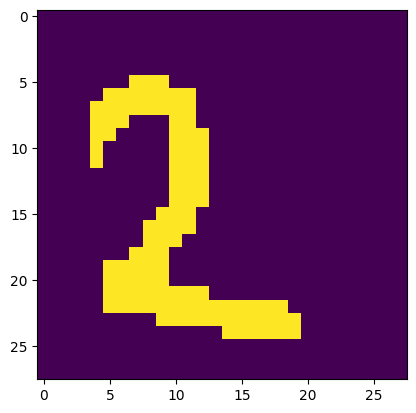

In [3]:
#separation of dependent and independent variable
X = data.drop(["label"],axis=1)
Y= data["label"]

            
#preview of one image using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)




In [4]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [5]:
#Fit the model using svc and also to save the model using joblib
#support vector machines
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.7


In [18]:
#KNeighbors Classifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
cla_knn = KNeighborsClassifier()
cla_knn.fit(train_x, train_y)

#accuracy testing
cla_knn.score(test_x,test_y)

0.72

In [15]:
#disciton tree
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x,train_y)
#accuracy test
clf.score(test_x,test_y)

0.52

In [8]:
#Random forest classifier algorithm
import joblib
from sklearn.ensemble import RandomForestClassifier
cla_rf = RandomForestClassifier(n_estimators = 100)
cla_rf.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer_randomforest")

#accuracy test
cla_rf.score(test_x,test_y)

0.79

In [1]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer_randomforest")
images_folder="img/"
  

img=ImageGrab.grab(bbox=(100,300,400,600))
    
img.save(images_folder+"img.png")
im = cv2.imread(images_folder+"img.png")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)

#Threshold the image
ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)

rows,cols=roi.shape

X = []


## Add pixel one by one into data array
for i in range(rows):
   for j in range(cols):
       k = roi[i,j]
       if k>100:
           k=1
       else:
           k=0
       X.append(k)


predictions  =model.predict([X])

print("Prediction:",predictions[0])
cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)

cv2.startWindowThread()
cv2.namedWindow("Result")
cv2.imshow("Result",im)
cv2.waitKey(10000)
   
cv2.destroyAllWindows()

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
